# Visualization

In [1]:
!pip install prophet==1.1.1

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
^C


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from prophet import Prophet

# Import data file and rename the columns 
data = pd.read_csv("/work/SupermarketSales.csv")
data.rename(columns={'Invoice.ID': 'ID', 'Product.line': 'productline', 'Date': 'date', 'gross.income': 'grossincome'}, inplace=True)


/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Create new dataframe only keep productline, date, and gross income
newdata = data.groupby(['productline', 'date'])['grossincome'].sum().to_frame().reset_index()
newdata['date'] = pd.to_datetime(newdata['date'])
newdata = newdata.sort_values(by='date').reset_index(drop=True)
newdata = newdata.set_index('date')


# Each product line gross income for first three months
H_B = pd.DataFrame(newdata.loc[newdata['productline'] == 'Health and beauty'])
E_A = pd.DataFrame(newdata.loc[newdata['productline'] == 'Electronic accessories'])
H_L = pd.DataFrame(newdata.loc[newdata['productline'] == 'Home and lifestyle'])
S_T = pd.DataFrame(newdata.loc[newdata['productline'] == 'Sports and travel'])
F_B = pd.DataFrame(newdata.loc[newdata['productline'] == 'Food and beverages'])
F_A = pd.DataFrame(newdata.loc[newdata['productline'] == 'Fashion accessories'])


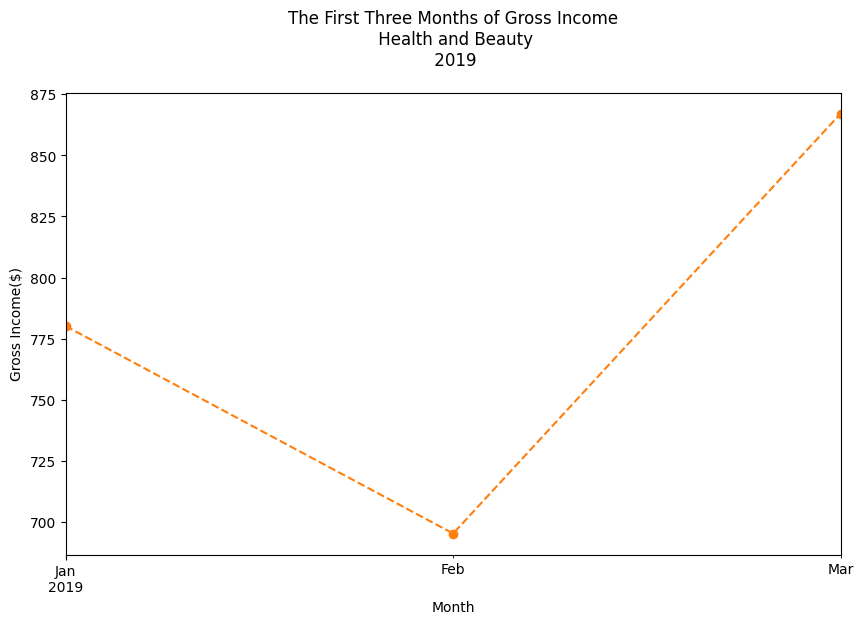

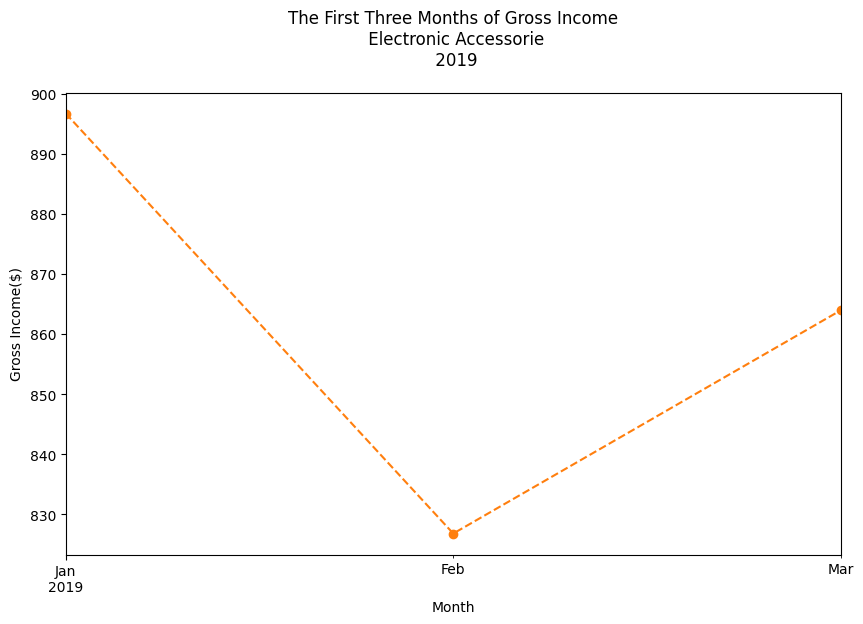

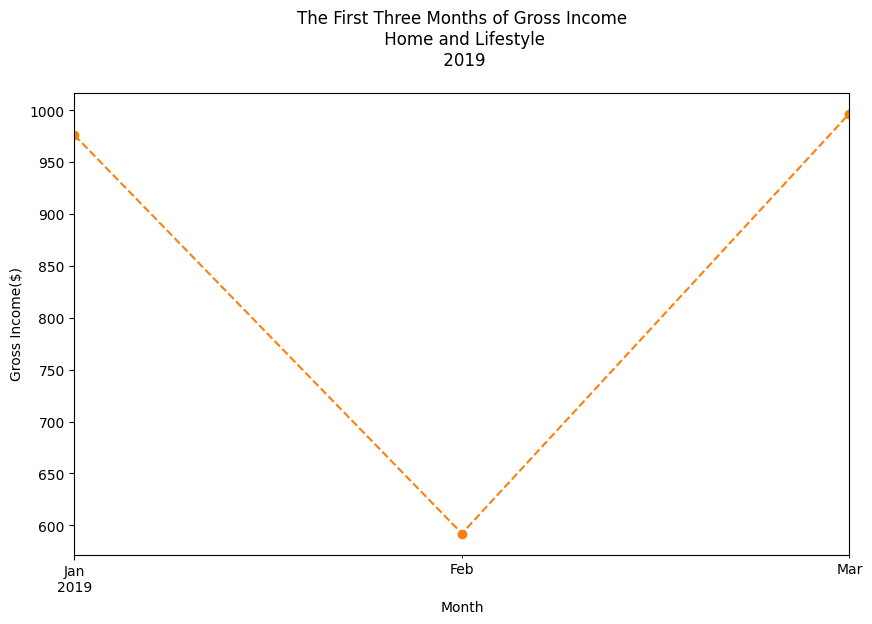

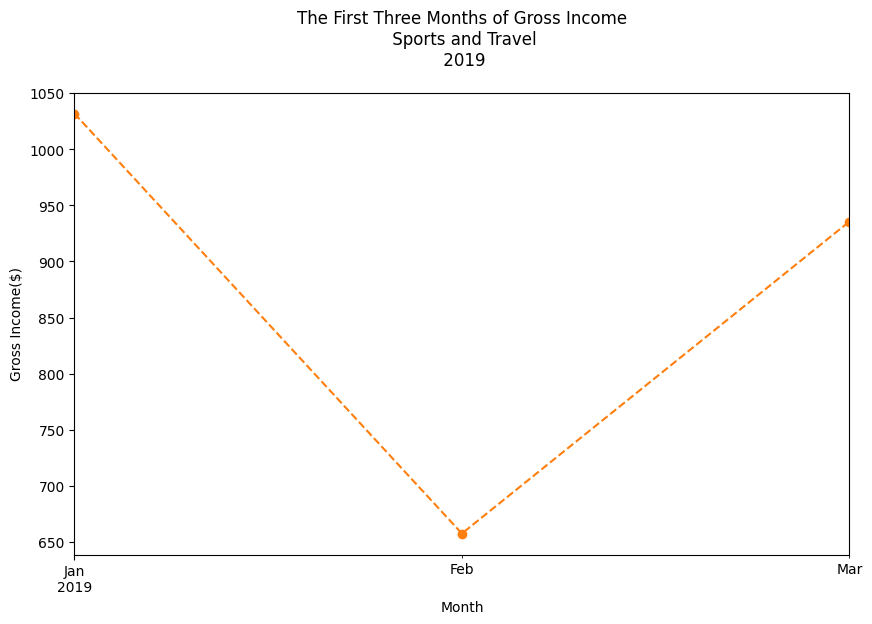

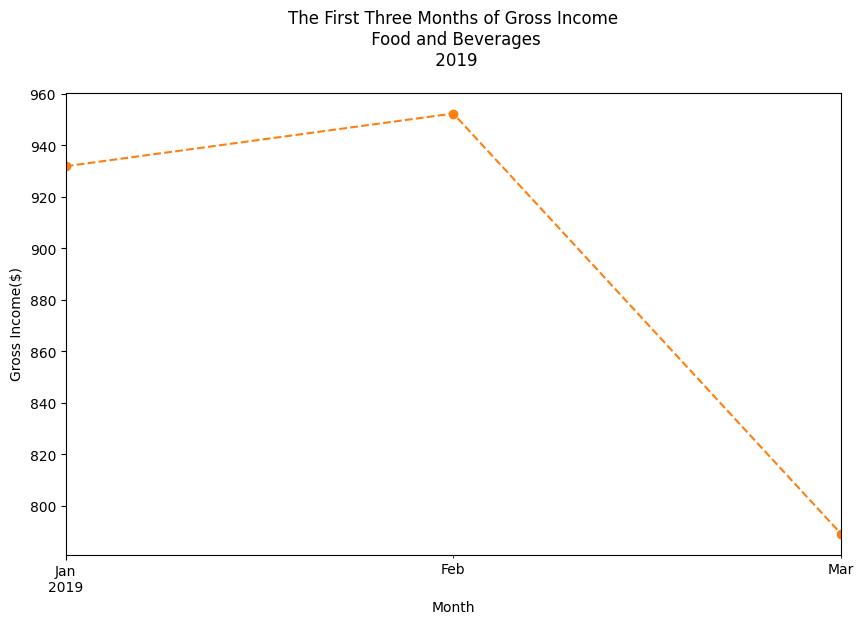

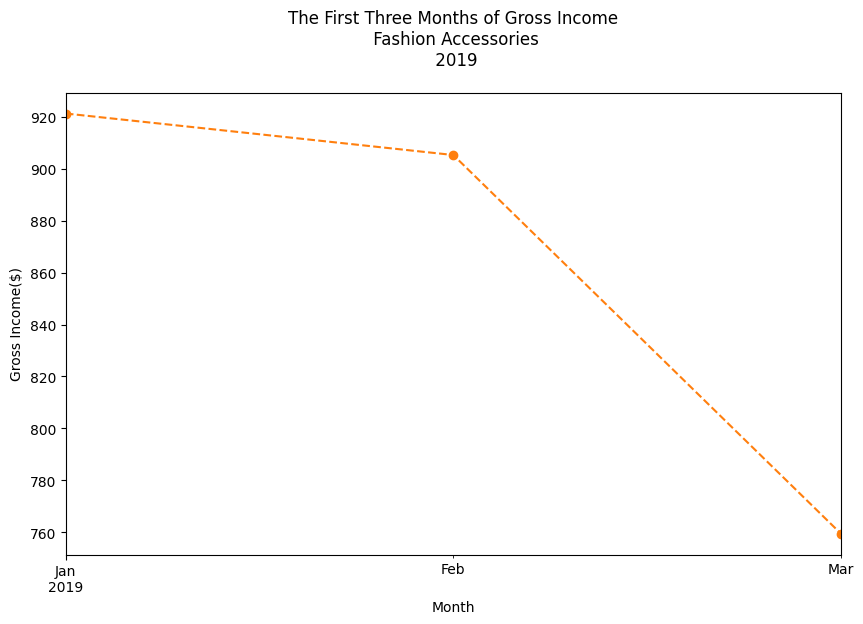

In [4]:
# Health and beauty Plot 
r_H_B = H_B.resample('M').sum()
plot_H_B = r_H_B.asfreq('M').plot(color='tab:orange', style='--o', figsize=(10, 6))
plot_H_B.set(xlabel='Month',
       ylabel='Gross Income($)')
plot_H_B.set_title('The First Three Months of Gross Income\n Health and Beauty\n 2019', pad=20) 
plot_H_B.get_legend().remove()

# Electronic accessories Plot 
r_E_A = E_A.resample('M').sum()
plot_E_A = r_E_A.asfreq('M').plot(color='tab:orange', style='--o', figsize=(10, 6))
plot_E_A.set(xlabel='Month',
       ylabel='Gross Income($)')
plot_E_A.set_title('The First Three Months of Gross Income\n Electronic Accessorie\n 2019', pad=20) 
plot_E_A.get_legend().remove()


# Home and lifestyle Plot 
r_H_L = H_L.resample('M').sum()
plot_H_L = r_H_L.asfreq('M').plot(color='tab:orange', style='--o', figsize=(10, 6))
plot_H_L.set(xlabel='Month',
       ylabel='Gross Income($)')
plot_H_L.set_title('The First Three Months of Gross Income\n Home and Lifestyle\n 2019', pad=20) 
plot_H_L.get_legend().remove()


# Sports and travele Plot 
r_S_T = S_T.resample('M').sum()
plot_S_T = r_S_T.asfreq('M').plot(color='tab:orange', style='--o', figsize=(10, 6))
plot_S_T.set(xlabel='Month',
       ylabel='Gross Income($)')
plot_S_T.set_title('The First Three Months of Gross Income\n Sports and Travel\n 2019', pad=20) 
plot_S_T.get_legend().remove()


# Food and beverages Plot 
r_F_B = F_B.resample('M').sum()
plot_F_B = r_F_B.asfreq('M').plot(color='tab:orange', style='--o', figsize=(10, 6))
plot_F_B.set(xlabel='Month',
       ylabel='Gross Income($)')
plot_F_B.set_title('The First Three Months of Gross Income\n Food and Beverages\n 2019', pad=20) 
plot_F_B.get_legend().remove()


# Fashion accessories Plot 
r_F_A = F_A.resample('M').sum()
plot_F_A = r_F_A.asfreq('M').plot(color='tab:orange', style='--o', figsize=(10, 6))
plot_F_A.set(xlabel='Month',
       ylabel='Gross Income($)')
plot_F_A.set_title('The First Three Months of Gross Income\n Fashion Accessories\n 2019', pad=20) 
plot_F_A.get_legend().remove()


# Prophet Prediction(productline)

undefined. Health and Beauty

In [5]:
H_B_prophet = H_B.copy()
H_B_prophet = H_B_prophet.reset_index()
H_B_prophet = H_B_prophet.drop('productline',axis=1)

In [6]:
H_B_prophet.columns = ['ds','y']

p = Prophet(interval_width=0.95)
model = p.fit(H_B_prophet)

01:48:46 - cmdstanpy - INFO - Chain [1] start processing
01:48:47 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = p.make_future_dataframe(periods=91, freq='D')
future

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
159,2019-06-25
160,2019-06-26
161,2019-06-27
162,2019-06-28


In [8]:
forecast_prediction = p.predict(future)
forecast_prediction


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,29.521808,-22.267673,84.775000,29.521808,29.521808,1.661807,1.661807,1.661807,1.661807,1.661807,1.661807,0.0,0.0,0.0,31.183615
1,2019-01-02,29.581056,-21.625172,83.379959,29.581056,29.581056,2.515927,2.515927,2.515927,2.515927,2.515927,2.515927,0.0,0.0,0.0,32.096982
2,2019-01-03,29.640303,-31.392243,75.832974,29.640303,29.640303,-7.973471,-7.973471,-7.973471,-7.973471,-7.973471,-7.973471,0.0,0.0,0.0,21.666832
3,2019-01-04,29.699551,-15.073390,90.387815,29.699551,29.699551,7.411989,7.411989,7.411989,7.411989,7.411989,7.411989,0.0,0.0,0.0,37.111540
4,2019-01-05,29.758799,-29.196853,82.689744,29.758799,29.758799,-3.129473,-3.129473,-3.129473,-3.129473,-3.129473,-3.129473,0.0,0.0,0.0,26.629325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2019-06-25,39.890171,-13.324035,95.945404,39.890160,39.890182,1.661807,1.661807,1.661807,1.661807,1.661807,1.661807,0.0,0.0,0.0,41.551978
160,2019-06-26,39.949419,-8.963897,97.186616,39.949408,39.949430,2.515927,2.515927,2.515927,2.515927,2.515927,2.515927,0.0,0.0,0.0,42.465346
161,2019-06-27,40.008667,-21.463512,85.977647,40.008656,40.008678,-7.973471,-7.973471,-7.973471,-7.973471,-7.973471,-7.973471,0.0,0.0,0.0,32.035195
162,2019-06-28,40.067915,-4.273994,99.687194,40.067903,40.067926,7.411989,7.411989,7.411989,7.411989,7.411989,7.411989,0.0,0.0,0.0,47.479903


In [9]:
# Total gross income for each month
forecast_prediction_total = forecast_prediction[['ds','trend']].copy()
forecast_prediction_total = forecast_prediction_total.groupby(pd.Grouper(key='ds', axis=0, freq='M')).sum()

forecast_prediction_total

,trend
ds,
2019-01-31,699.264322
2019-02-28,804.284223
2019-03-31,880.493291
2019-04-30,1071.396057
2019-05-31,1163.128046
2019-06-30,1139.633105


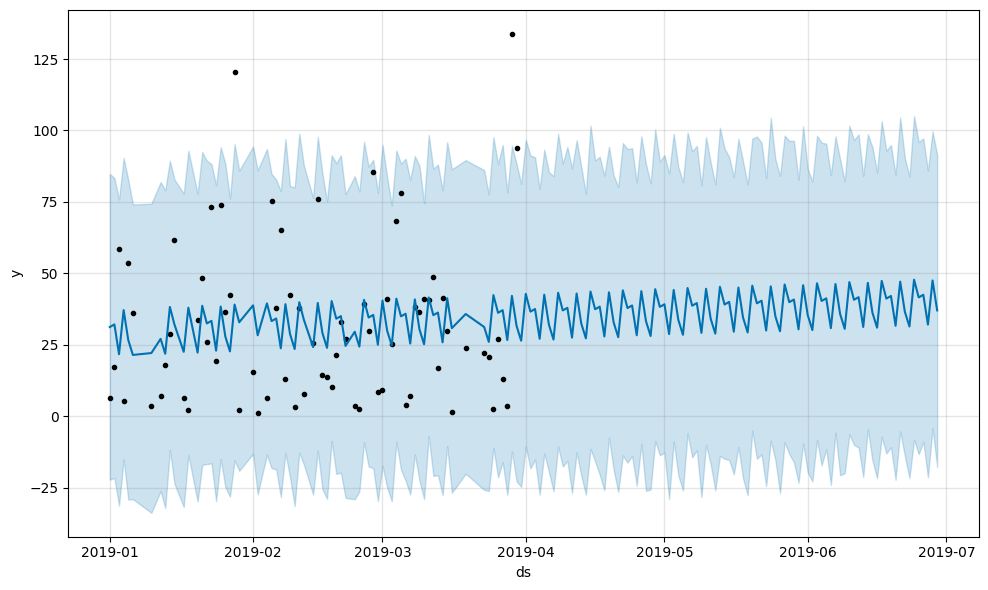

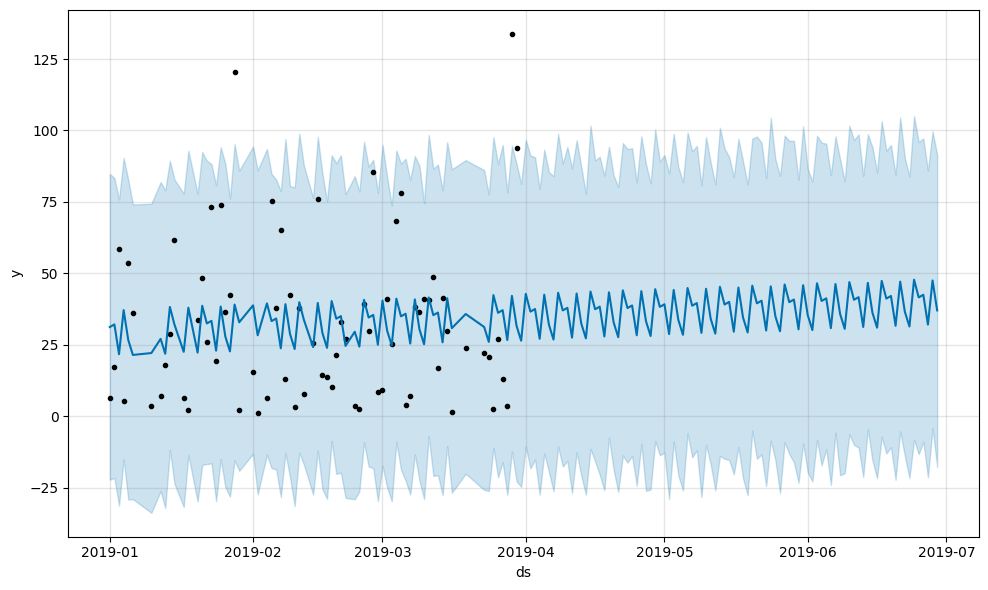

In [10]:
p.plot(forecast_prediction)

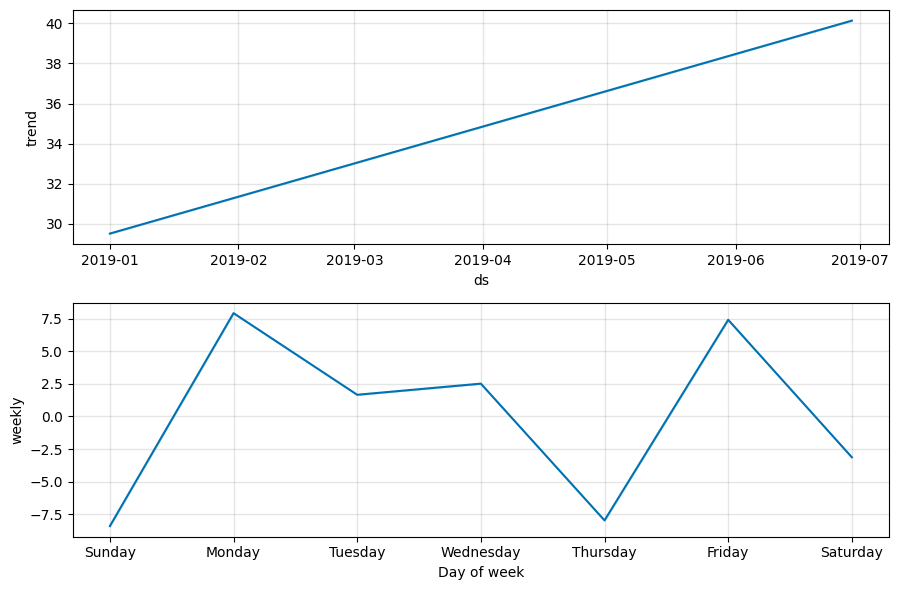

In [11]:
plot2 = p.plot_components(forecast_prediction)


# Prediction for Branch ABC

In [12]:
newdata = data.groupby(['productline', 'date'])['grossincome'].sum().to_frame().reset_index()
newdata['date'] = pd.to_datetime(newdata['date'])
newdata = newdata.sort_values(by='date').reset_index(drop=True)
newdata = newdata.set_index('date')





branch = data.copy()
branch = data.drop(['Unnamed: 0','ID','productline','City','Customer.type','Gender','Tax.5.','Total',
                        'Time','Payment','cogs','gross.margin.percentage','Rating',
                        'Unit.price','Quantity'], axis=1)
branch

,Branch,date,grossincome
0,A,2019-01-05,26.1415
1,C,2019-03-08,3.8200
2,A,2019-03-03,16.2155
3,A,2019-01-27,23.2880
4,A,2019-02-08,30.2085
...,...,...,...
995,C,2019-01-29,2.0175
996,B,2019-03-02,48.6900
997,A,2019-02-09,1.5920
998,A,2019-02-22,3.2910


undefined. Branch A dataset

In [13]:
branchA = pd.DataFrame(branch.loc[branch['Branch'] == 'A'])
branchA = branchA.groupby(['Branch', 'date'])['grossincome'].sum().to_frame().reset_index()
branchA['grossincome'] = branchA['grossincome'].round(2)

branchA


,Branch,date,grossincome
0,A,2019-01-01,112.92
1,A,2019-01-02,14.62
2,A,2019-01-03,44.64
3,A,2019-01-04,23.01
4,A,2019-01-05,96.40
...,...,...,...
84,A,2019-03-26,56.54
85,A,2019-03-27,50.51
86,A,2019-03-28,78.71
87,A,2019-03-29,46.55


2. Branch B dataset

In [14]:
branchB = pd.DataFrame(branch.loc[branch['Branch'] == 'B'])
branchB = branchB.groupby(['Branch', 'date'])['grossincome'].sum().to_frame().reset_index()
branchB['grossincome'] = branchB['grossincome'].round(2)

branchB

,Branch,date,grossincome
0,B,2019-01-01,73.18
1,B,2019-01-02,55.37
2,B,2019-01-03,48.41
3,B,2019-01-04,24.31
4,B,2019-01-05,23.18
...,...,...,...
81,B,2019-03-26,14.34
82,B,2019-03-27,42.80
83,B,2019-03-28,4.56
84,B,2019-03-29,98.09


3. Branch C dataset

In [15]:
branchC = pd.DataFrame(branch.loc[branch['Branch'] == 'C'])
branchC = branchC.groupby(['Branch', 'date'])['grossincome'].sum().to_frame().reset_index()
branchC['grossincome'] = branchC['grossincome'].round(2)

branchC

,Branch,date,grossincome
0,C,2019-01-01,39.86
1,C,2019-01-02,22.65
2,C,2019-01-03,5.91
3,C,2019-01-04,29.99
4,C,2019-01-05,48.83
...,...,...,...
83,C,2019-03-26,22.57
84,C,2019-03-27,44.92
85,C,2019-03-28,22.90
86,C,2019-03-29,46.94


## Branch A

In [16]:
branchA_predict = branchA.copy()
branchA_predict = branchA_predict.drop('Branch',axis=1).reset_index(drop=True)

branchA_predict

,date,grossincome
0,2019-01-01,112.92
1,2019-01-02,14.62
2,2019-01-03,44.64
3,2019-01-04,23.01
4,2019-01-05,96.40
...,...,...
84,2019-03-26,56.54
85,2019-03-27,50.51
86,2019-03-28,78.71
87,2019-03-29,46.55


In [17]:
branchA_predict.columns = ['ds','y']

p = Prophet(interval_width=0.95)
model = p.fit(branchA_predict)

01:48:50 - cmdstanpy - INFO - Chain [1] start processing
01:48:50 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
futureA = p.make_future_dataframe(periods=91, freq='D')
futureA

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
175,2019-06-25
176,2019-06-26
177,2019-06-27
178,2019-06-28


In [19]:
forecast_predictionA = p.predict(futureA)
forecast_predictionA


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,57.207457,-11.151549,125.724599,57.207457,57.207457,-2.164486,-2.164486,-2.164486,-2.164486,-2.164486,-2.164486,0.0,0.0,0.0,55.042972
1,2019-01-02,57.202296,-18.386507,115.871482,57.202296,57.202296,-8.333538,-8.333538,-8.333538,-8.333538,-8.333538,-8.333538,0.0,0.0,0.0,48.868757
2,2019-01-03,57.197134,-7.835750,125.346950,57.197134,57.197134,-0.443351,-0.443351,-0.443351,-0.443351,-0.443351,-0.443351,0.0,0.0,0.0,56.753783
3,2019-01-04,57.191972,-19.676863,120.861868,57.191972,57.191972,-3.652092,-3.652092,-3.652092,-3.652092,-3.652092,-3.652092,0.0,0.0,0.0,53.539880
4,2019-01-05,57.186811,-3.162349,123.444650,57.186811,57.186811,4.482487,4.482487,4.482487,4.482487,4.482487,4.482487,0.0,0.0,0.0,61.669297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2019-06-25,56.304154,-15.305029,122.168053,56.304142,56.304168,-2.164486,-2.164486,-2.164486,-2.164486,-2.164486,-2.164486,0.0,0.0,0.0,54.139668
176,2019-06-26,56.298993,-19.667668,119.674481,56.298980,56.299007,-8.333538,-8.333538,-8.333538,-8.333538,-8.333538,-8.333538,0.0,0.0,0.0,47.965454
177,2019-06-27,56.293831,-7.036699,130.749061,56.293818,56.293845,-0.443351,-0.443351,-0.443351,-0.443351,-0.443351,-0.443351,0.0,0.0,0.0,55.850480
178,2019-06-28,56.288669,-16.847969,118.633990,56.288656,56.288684,-3.652092,-3.652092,-3.652092,-3.652092,-3.652092,-3.652092,0.0,0.0,0.0,52.636577


In [20]:
# Total gross income for each month
forecast_predictionA_total = forecast_predictionA[['ds','trend']].copy()
forecast_predictionA_total = forecast_predictionA_total.groupby(pd.Grouper(key='ds', axis=0, freq='M')).sum().round(2).reset_index()
forecast_predictionA_total.columns = ['Date','Total Gross Income']
forecast_predictionA_total['Date'] = forecast_predictionA_total['Date'].dt.strftime('%B')
forecast_predictionA_total = forecast_predictionA_total.set_index(['Date'])

forecast_predictionA_total

,Total Gross Income
Date,
January,1771.03
February,1595.38
March,1761.59
April,1700.04
May,1751.83
June,1634.32


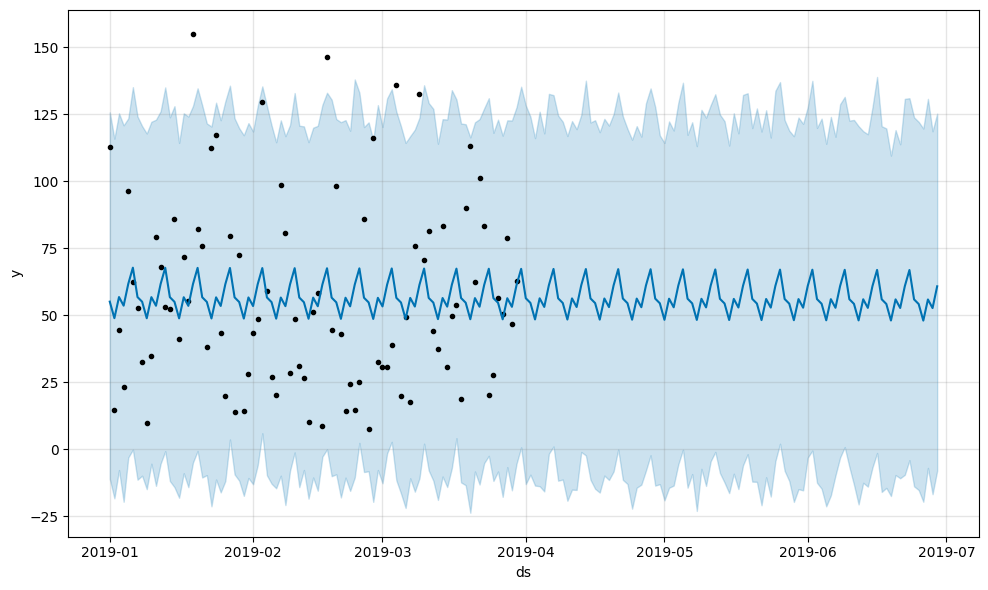

In [21]:
plot1A = p.plot(forecast_predictionA,
              uncertainty=True)


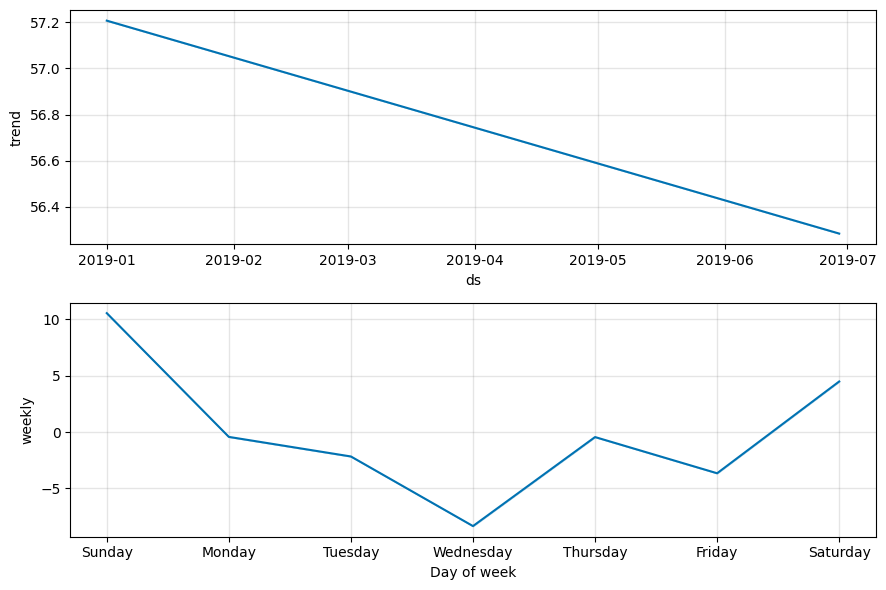

In [22]:
plot2A = p.plot_components(forecast_predictionA)


<Figure size 1000x600 with 0 Axes>

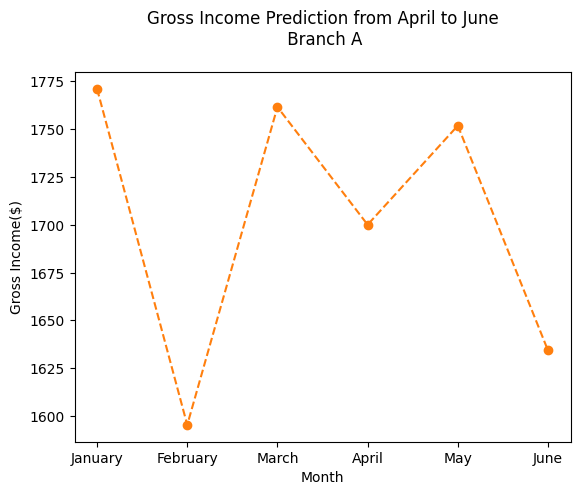

<Figure size 1000x600 with 0 Axes>

In [23]:
plot3A = plt.plot(forecast_predictionA_total, '--o')
plt.setp(plot3A,color='tab:orange')
plt.xlabel('Month')
plt.ylabel('Gross Income($)')
plt.title('Gross Income Prediction from April to June\n Branch A', pad=20)
plt.figure(figsize=(10, 6))





## Branch B

In [24]:
branchB_predict = branchB.copy()
branchB_predict = branchB_predict.drop('Branch',axis=1).reset_index(drop=True)

branchB_predict

,date,grossincome
0,2019-01-01,73.18
1,2019-01-02,55.37
2,2019-01-03,48.41
3,2019-01-04,24.31
4,2019-01-05,23.18
...,...,...
81,2019-03-26,14.34
82,2019-03-27,42.80
83,2019-03-28,4.56
84,2019-03-29,98.09


In [25]:
branchB_predict.columns = ['ds','y']
p = Prophet(interval_width=0.95)
model = p.fit(branchB_predict)

01:48:53 - cmdstanpy - INFO - Chain [1] start processing
01:48:53 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
futureB = p.make_future_dataframe(periods=91, freq='D')
futureB

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
172,2019-06-25
173,2019-06-26
174,2019-06-27
175,2019-06-28


In [27]:
forecast_predictionB = p.predict(futureB)
forecast_predictionB

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,63.799245,-5.728548,153.499776,63.799245,63.799245,10.232952,10.232952,10.232952,10.232952,10.232952,10.232952,0.0,0.0,0.0,74.032197
1,2019-01-02,63.681317,-27.009082,134.376767,63.681317,63.681317,-8.098153,-8.098153,-8.098153,-8.098153,-8.098153,-8.098153,0.0,0.0,0.0,55.583164
2,2019-01-03,63.563389,-18.085896,150.316114,63.563389,63.563389,-0.813959,-0.813959,-0.813959,-0.813959,-0.813959,-0.813959,0.0,0.0,0.0,62.749430
3,2019-01-04,63.445461,-15.735598,145.427036,63.445461,63.445461,4.444805,4.444805,4.444805,4.444805,4.444805,4.444805,0.0,0.0,0.0,67.890266
4,2019-01-05,63.327533,1.236879,163.294736,63.327533,63.327533,19.589823,19.589823,19.589823,19.589823,19.589823,19.589823,0.0,0.0,0.0,82.917357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2019-06-25,43.161846,-28.208660,135.288507,43.161831,43.161858,10.232952,10.232952,10.232952,10.232952,10.232952,10.232952,0.0,0.0,0.0,53.394798
173,2019-06-26,43.043918,-39.490850,115.626652,43.043903,43.043931,-8.098153,-8.098153,-8.098153,-8.098153,-8.098153,-8.098153,0.0,0.0,0.0,34.945764
174,2019-06-27,42.925990,-36.901249,124.640406,42.925975,42.926003,-0.813959,-0.813959,-0.813959,-0.813959,-0.813959,-0.813959,0.0,0.0,0.0,42.112030
175,2019-06-28,42.808062,-30.123573,129.512286,42.808046,42.808075,4.444805,4.444805,4.444805,4.444805,4.444805,4.444805,0.0,0.0,0.0,47.252866


In [28]:
# Total gross income for each month
forecast_predictionB_total = forecast_predictionB[['ds','trend']].copy()
forecast_predictionB_total = forecast_predictionB_total.groupby(pd.Grouper(key='ds', axis=0, freq='M')).sum().round(2).reset_index()
forecast_predictionB_total.columns = ['Date','Total Gross Income']
forecast_predictionB_total['Date'] = forecast_predictionB_total['Date'].dt.strftime('%B')
forecast_predictionB_total = forecast_predictionB_total.set_index(['Date'])

forecast_predictionB_total

,Total Gross Income
Date,
January,1799.12
February,1579.30
March,1707.25
April,1544.27
May,1484.25
June,1285.89


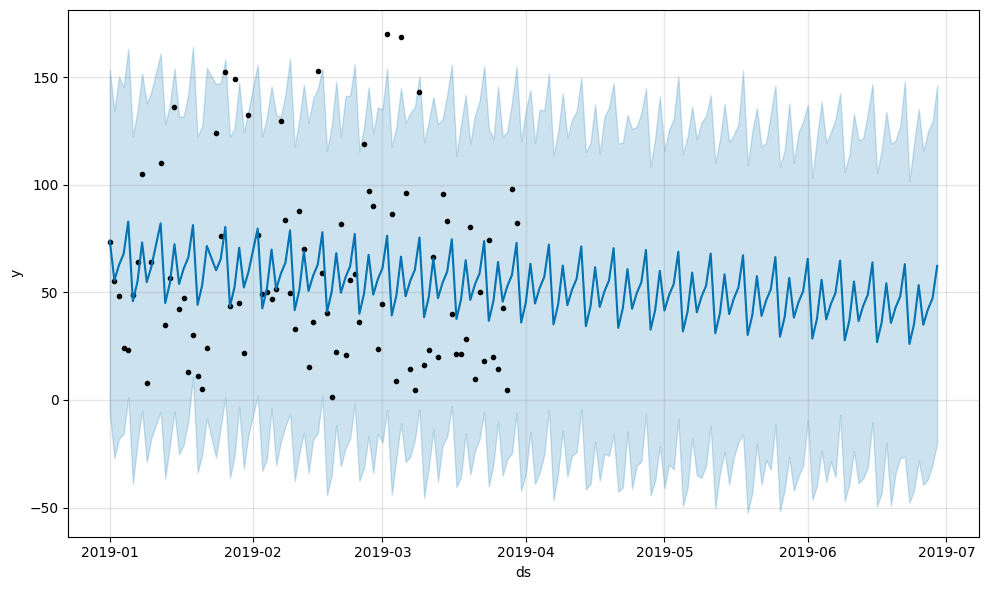

In [29]:
plot1B = p.plot(forecast_predictionB,
              uncertainty=True)

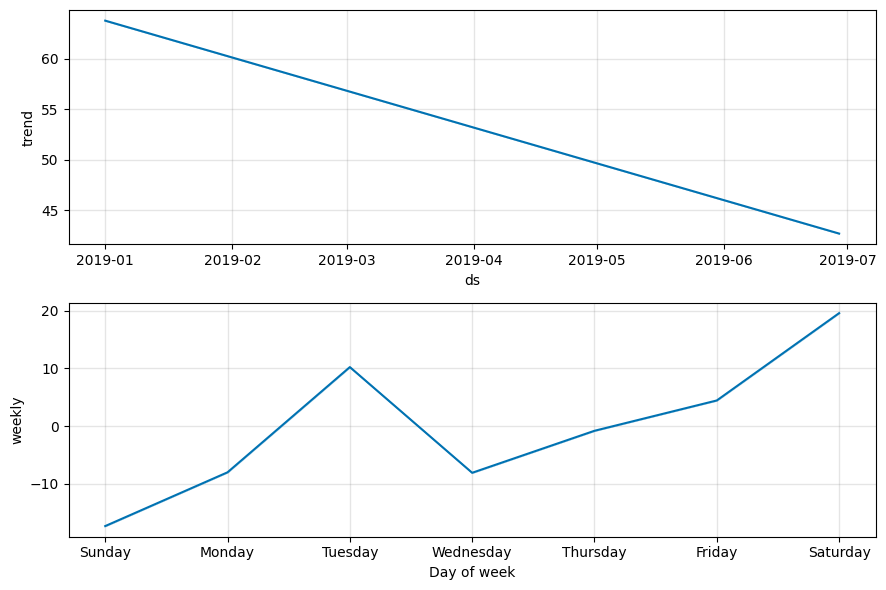

In [30]:
plot2B = p.plot_components(forecast_predictionB)

<Figure size 1000x600 with 0 Axes>

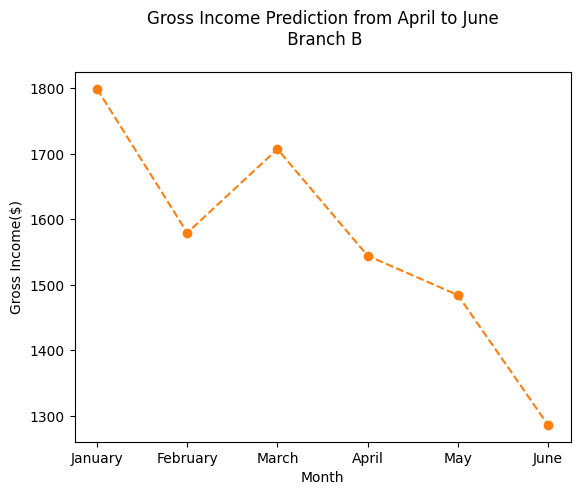

<Figure size 1000x600 with 0 Axes>

In [31]:
plot3B = plt.plot(forecast_predictionB_total, '--o')
plt.setp(plot3B,color='tab:orange')
plt.xlabel('Month')
plt.ylabel('Gross Income($)')
plt.title('Gross Income Prediction from April to June\n Branch B', pad=20)
plt.figure(figsize=(10, 6))

## Branch C

In [32]:
branchC_predict = branchC.copy()
branchC_predict = branchC_predict.drop('Branch',axis=1).reset_index(drop=True)

branchC_predict

,date,grossincome
0,2019-01-01,39.86
1,2019-01-02,22.65
2,2019-01-03,5.91
3,2019-01-04,29.99
4,2019-01-05,48.83
...,...,...
83,2019-03-26,22.57
84,2019-03-27,44.92
85,2019-03-28,22.90
86,2019-03-29,46.94


In [33]:
branchC_predict.columns = ['ds','y']

p = Prophet(interval_width=0.95)
model = p.fit(branchC_predict)

01:48:56 - cmdstanpy - INFO - Chain [1] start processing
01:48:57 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
futureC = p.make_future_dataframe(periods=91, freq='D')
futureC

,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
174,2019-06-25
175,2019-06-26
176,2019-06-27
177,2019-06-28


In [35]:
forecast_predictionC = p.predict(futureC)
forecast_predictionC

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,61.241574,-5.222476,137.602164,61.241574,61.241574,4.932153,4.932153,4.932153,4.932153,4.932153,4.932153,0.0,0.0,0.0,66.173727
1,2019-01-02,61.207033,-2.859226,139.024290,61.207033,61.207033,5.287657,5.287657,5.287657,5.287657,5.287657,5.287657,0.0,0.0,0.0,66.494690
2,2019-01-03,61.172492,-14.142010,123.240202,61.172492,61.172492,-7.889854,-7.889854,-7.889854,-7.889854,-7.889854,-7.889854,0.0,0.0,0.0,53.282638
3,2019-01-04,61.137951,-7.268766,125.658318,61.137951,61.137951,-0.399333,-0.399333,-0.399333,-0.399333,-0.399333,-0.399333,0.0,0.0,0.0,60.738618
4,2019-01-05,61.103410,2.901710,138.688068,61.103410,61.103410,6.546519,6.546519,6.546519,6.546519,6.546519,6.546519,0.0,0.0,0.0,67.649929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2019-06-25,55.196900,-6.722503,127.497851,55.196886,55.196913,4.932153,4.932153,4.932153,4.932153,4.932153,4.932153,0.0,0.0,0.0,60.129053
175,2019-06-26,55.162359,-15.843652,132.107725,55.162345,55.162372,5.287657,5.287657,5.287657,5.287657,5.287657,5.287657,0.0,0.0,0.0,60.450016
176,2019-06-27,55.127818,-25.482634,115.623474,55.127804,55.127832,-7.889854,-7.889854,-7.889854,-7.889854,-7.889854,-7.889854,0.0,0.0,0.0,47.237964
177,2019-06-28,55.093277,-14.829841,125.425702,55.093262,55.093291,-0.399333,-0.399333,-0.399333,-0.399333,-0.399333,-0.399333,0.0,0.0,0.0,54.693944


In [36]:
# Total gross income for each month
forecast_predictionC_total = forecast_predictionC[['ds','trend']].copy()
forecast_predictionC_total = forecast_predictionC_total.groupby(pd.Grouper(key='ds', axis=0, freq='M')).sum().round(2).reset_index()
forecast_predictionC_total.columns = ['Date','Total Gross Income']
forecast_predictionC_total['Date'] = forecast_predictionC_total['Date'].dt.strftime('%B')
forecast_predictionC_total = forecast_predictionC_total.set_index(['Date'])

forecast_predictionC_total

,Total Gross Income
Date,
January,1882.43
February,1671.73
March,1760.77
April,1728.96
May,1753.93
June,1610.73


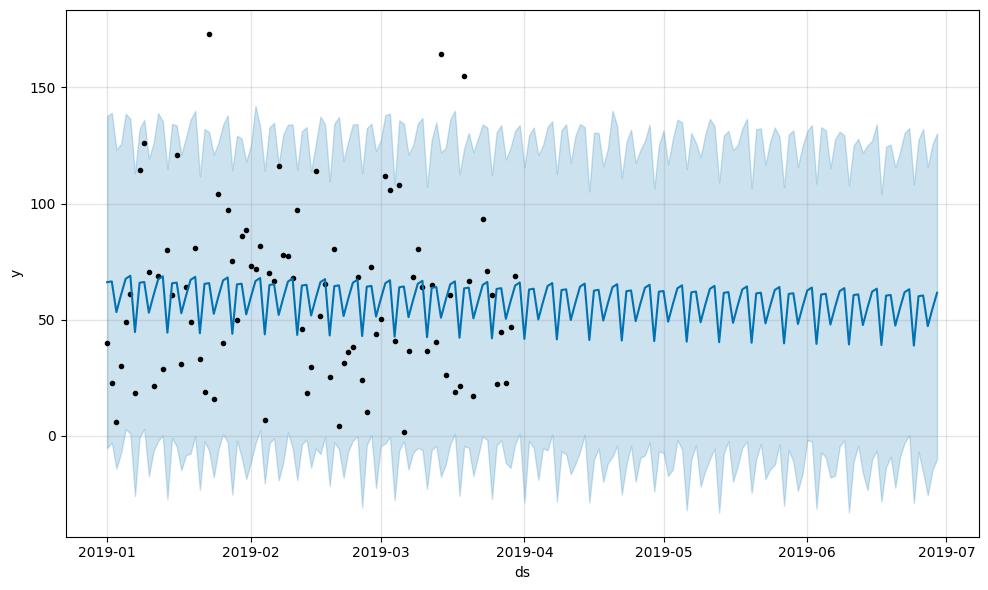

In [37]:
plot1C = p.plot(forecast_predictionC,
              uncertainty=True)

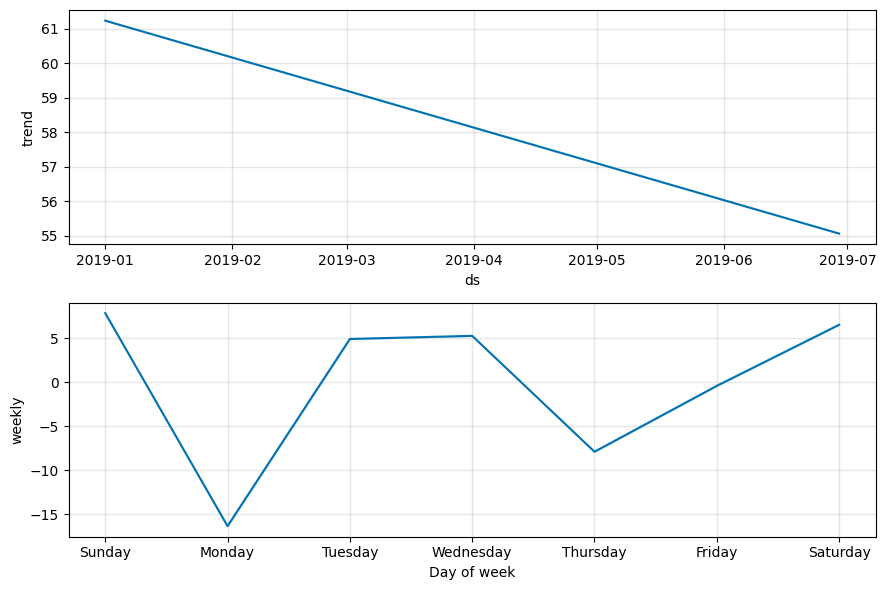

In [38]:
plot2C = p.plot_components(forecast_predictionC)

<Figure size 1000x600 with 0 Axes>

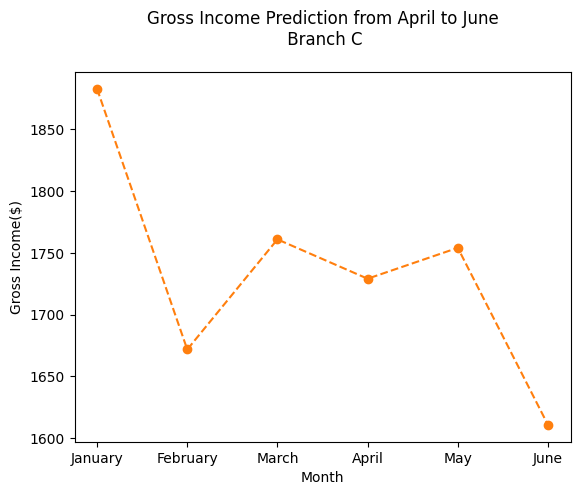

<Figure size 1000x600 with 0 Axes>

In [39]:
plot3C = plt.plot(forecast_predictionC_total, '--o')
plt.setp(plot3C,color='tab:orange')
plt.xlabel('Month')
plt.ylabel('Gross Income($)')
plt.title('Gross Income Prediction from April to June\n Branch C', pad=20)
plt.figure(figsize=(10, 6))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a71a9ba6-8121-453d-a9bf-3294fde13782' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>